# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton


# Your Code goes here:
import os
from utils.plotter import plot_hinton
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import linear_model

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
print("Displaying first 5 data points:")
display(auto_numeric.head())
print("Displaying attribute stats:")
display(auto_numeric.describe())
print("Displaying shape of dataset:")
display(auto_numeric.shape)

Displaying first 5 data points:


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


Displaying attribute stats:


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


Displaying shape of dataset:


(159, 16)

(2) ***Your answer goes here:***
The dataset describes the ***physical attributes, the engine characteristics, the fuel stats and the price*** of 159 cars. It also describes the normalized losses which is a metric used to compare cars against one and another, it is the relative average loss payment per insured vehicle year.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

Correlationn Coefficient between: 
price and normalized-losses is:  0.015367647423658213
price and wheel-base is:  0.42351059515038575
price and length is:  0.5128830452653906
price and width is:  0.5243255521274494
price and height is:  0.13956255898680378
price and engine-size is:  0.7151245901914791
price and bore is:  0.3652072892128543
price and stroke is:  0.127834031932651
price and compression-ratio is:  0.12568322167466553
price and engine-power is:  0.44396859146316336
price and peak-rpm is:  -0.09934529106318549
price and city-mpg is:  -0.35678950067247023
price and highway-mpg is:  -0.4384674317144328
price and mean-effective-pressure is:  -0.10486005065048887
price and torque is:  0.1014345813072746


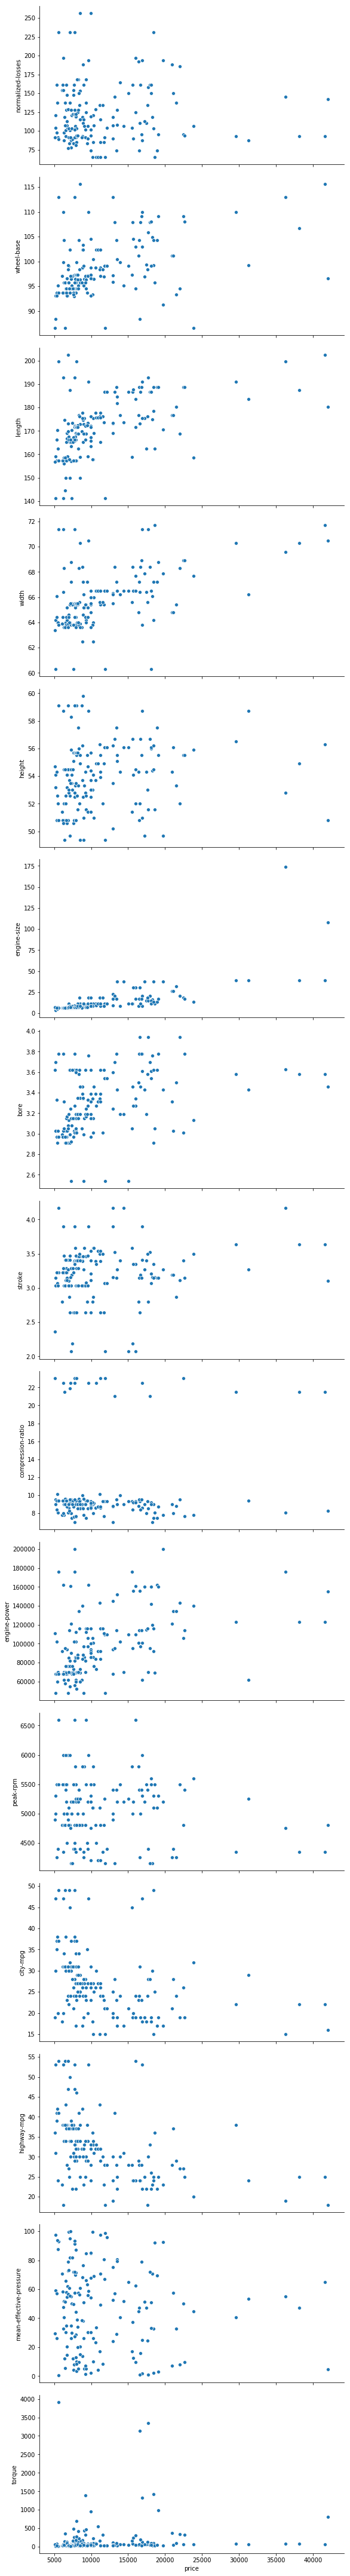

In [3]:
# (1) # Your Code goes here:
attributeList = auto_numeric.columns[:-1]
print("Correlationn Coefficient between: ")
for i in range(len(attributeList)):
    colName = (auto_numeric.columns[i])
    pearsonsCoeff = np.corrcoef(auto_numeric['price'],auto_numeric[colName])[0][1]
    print("price and",colName, "is: ",pearsonsCoeff)



ax = sns.pairplot(auto_numeric, hue=None, hue_order=None, palette='husl',
                  vars=None, x_vars=['price'], y_vars= attributeList, kind='scatter',
                  diag_kind='auto', markers='o', height=4,
                  aspect=2.0, dropna=True, plot_kws=None, diag_kws=dict(shade=True))


#plt.xlabel('Price')


(2) ***Your answer goes here:***  
I have chosen the attributes that have the highest positive correlation coefficients as these have the higest positive coefficients.  
1. engine-size    
2. length  
3. width  
4. engine-power  
5. wheel-base  

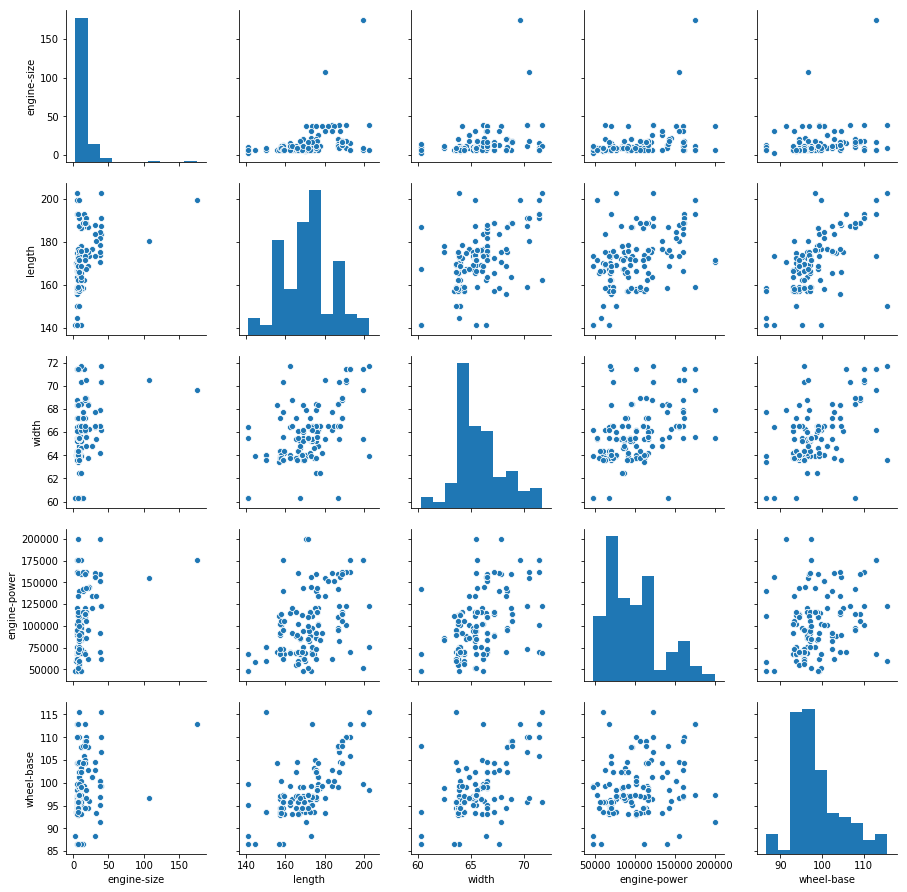

In [4]:
# (3) # Your Code goes here: df[['a','b']]
priceDrivingCols = auto_numeric[['engine-size','length','width','engine-power','wheel-base']]
ax3 = sns.pairplot(priceDrivingCols)

(4) #STARTHIDE#

[2 Marks] Identify at least 2 pairs which appear correlated. Some examples are: 
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`
  
The 2 pairs that appear to be correlated are:

1. length and wheel base  
2. width and wheel-base


(5) ***Your answer goes here:***  
In my opinion the attributes that have correlation coefficients that are closest to 0 would be the ideal attributes to remove and thereby reduce the dimentionality problem.  
Some of these would be peak-rpm, normalized losses, torque, mean-effective-pressure, compression-ratio and stroke.


## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

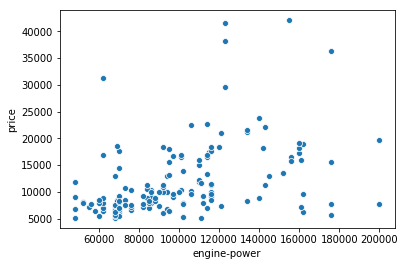

In [5]:
# (1) # Your Code goes here:
ax2 = sns.scatterplot(x=auto_numeric['engine-power'], y=auto_numeric['price'])

(2) ***Your answer goes here:***  
The engine power alone, is not enough to predict the price.   
The plot shows a weak linear correlation between the engine power and the price. Most of the prices are within the the 5000-25000 range and are concentrated around 10000 (irrespective of the engine power) with quite a few outliers.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

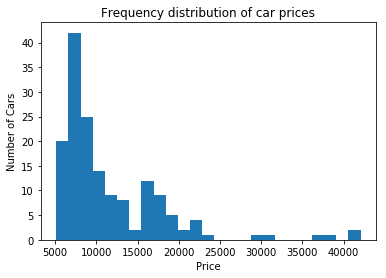

In [6]:
# (1) # Your Code goes here:
# ax3 = sns.distplot(auto_numeric['price'],rug=True, rug_kws={"color": "g"},
#                    kde_kws={"color": "r", "lw": 3},
#                    hist_kws={"histtype": "step", "linewidth": 4,
#                              "alpha": 1, "color": "b"} )


plt.hist(auto_numeric["price"], 25)
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.title("Frequency distribution of car prices")
plt.show()

(2) ***Your answer goes here:***  

We could visualise the data, making sure the relationship between the residuals and predicted values is not obviously nonlinear, and then remove the outliers before fiting the data to the model. We do this to make sure linear regression line is appropriate to the the data

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [7]:
# Your Code goes here:

X = auto_numeric["engine-power"].values
X = X.reshape(X.shape[0], 1)
y = auto_numeric["price"].values
y = y.reshape(y.shape[0],1)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size=0.2, random_state=0)

(159, 1) (159, 1)


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [8]:
# Your Code goes here:
predictPrice = (auto_numeric["price"].values).mean()
print("The BaseLine classifier I chose to use is taking the mean value of the Price, i.e: ""%.2f"%predictPrice)

The BaseLine classifier I chose to use is taking the mean value of the Price, i.e: 11684.72


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [9]:
# (1) # Your Code goes here:
regr = LinearRegression(normalize=True)
regr.fit(X_train,y_train)

print("Coefficient: ",regr.coef_)
print("Y intercept: ", regr.intercept_)


Coefficient:  [[0.08988389]]
Y intercept:  [2823.1218911]


(2) ***Your answer goes here:***  
The engine-power doesn't seem to be a very good metric to use while trying to estimate

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

(32, 1) (32, 1)


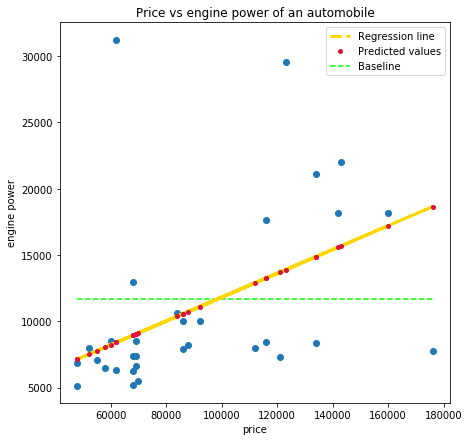

In [10]:
# (1) # Your Code goes here:
#regr.fit(X_test,y_test)
m = regr.coef_
c = regr.intercept_

plt.figure(figsize=(7,7))
print(X_test.shape,y_test.shape)
plt.scatter(X_test, y_test)

plt.plot(X_test, ((m*X_test) + c), c='gold',linestyle='--', linewidth = 3, label="Regression line")
plt.plot(X_test, ((m*X_test) + c), c='crimson',marker='o',label ='Predicted values',linestyle=' ',markersize= 4)
plt.hlines(predictPrice, X_test.min(), X_test.max(),colors='lime', linestyles='--', label='Baseline')
plt.xlabel("price")
plt.ylabel("engine power")

plt.title("Price vs engine power of an automobile")
plt.legend()
plt.show()

(2) ***Your answer goes here:***
Linear Regression model greately outperforms the baseline model.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

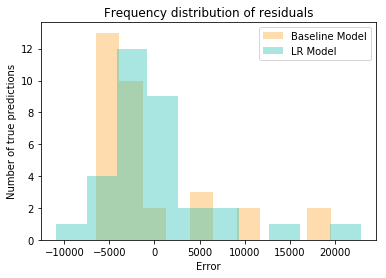

In [11]:
# (1) # Your Code goes here:
baseLoss = y_test-predictPrice
res = y_test - regr.predict(X_test)
#print(baseLoss)

plt.hist(baseLoss,10,color="#FFA73064",label="Baseline Model")
plt.hist(res, 10,color='#24C1B764', label= "LR Model")

plt.xlabel("Error")
plt.ylabel("Number of true predictions")
plt.title("Frequency distribution of residuals")

plt.legend()
plt.show()

In [12]:
y_pred = regr.predict(X_test)
print(y_pred.shape)

(32, 1)


In [13]:
# (2) # Your Code goes here:
y_pred = regr.predict(X_test)
print("For the LR model: ")
print ("The Coefficient of Determination is : {:.3f}" .format(r2_score(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ("The Root mean squared error is : {:.3f}" .format(rmse))

predPriceArray = np.ones_like(y_test)*predictPrice

print("\n\nFor the BaseLine model:")
print ("The Coefficient of Determination is : {:.3f}" .format(r2_score(y_test, predPriceArray)))
rmse = np.sqrt(mean_squared_error(y_test, predPriceArray))
print ("The Root mean squared error is : {:.3f}" .format(rmse))

For the LR model: 
The Coefficient of Determination is : 0.169
The Root mean squared error is : 6153.704


For the BaseLine model:
The Coefficient of Determination is : -0.010
The Root mean squared error is : 6781.638


(3) ***Your answer goes here:***  
The histrogram shows the number of classifications with the extent of their error.  
i.e, For error = 0 (correctly classified datapoint), its easily noticeable that the LR model has classified the data siginficantly better.   
The baseline model being the mean value, does have a larger extent of error, going into the 3000 region.


***Root Mean Square Error (RMSE)*** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.


***R-squared*** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 1:

0 indicates that the model explains none of the variability of the response data around its mean.
1 indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. 


<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***  
On using hold-out the same data sets are always used as for training and testing. This could lead to overfitting as the same test data is continously used.  
While KFold slices the data into parts and uses every part as a test and a train dataset. This ensures that all the data is used at some point as both a test and a training data point


In [14]:
# (2) # Your Code goes here:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
 

In [15]:
#(3) # Your Code goes here:
# regr_new = LinearRegression(normalize=True)
regr_new = linear_model.LinearRegression()
y_pred = cross_val_predict(regr_new, X, y, cv = kf)


print ("The Coefficient of Determination is : {:.3f}" .format(r2_score(y, y_pred)))
rmse = np.sqrt(mean_squared_error(y, y_pred))
print ("The Root mean squared error is : {:.3f}" .format(rmse))

The Coefficient of Determination is : 0.173
The Root mean squared error is : 6114.452


(4) ***Your answer goes here:***  
As seen, RMS error and Coefficient of Determination have both improved as compared to using a simple LR model.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [16]:
# (1) # Your Code goes here:

In [17]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [18]:
# (1) # Your Code goes here:
#auto_numeric.columns[]

data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
X = auto_numeric.drop(columns='price',axis=1).values
y = auto_numeric['price'].values

    
regrMulti = linear_model.LinearRegression()
y_pred = cross_val_predict(regrMulti,X,y, cv = kf)


print ("The Coefficient of Determination is : {:.3f}" .format(r2_score(y, y_pred)))
rmse = np.sqrt(mean_squared_error(y, y_pred))
print ("The Root mean squared error is : {:.3f}" .format(rmse))
#auto_numeric.describe()

The Coefficient of Determination is : 0.486
The Root mean squared error is : 4819.805


(2) ***Your answer goes here:***

Using multivariate linear regression, all the attributes are accounted for and there is a significant increase in the performance as seen in the measure of The Coefficient of Determination, which has increased and the decrease in Root mean squared error

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

Text(0.5, 1.0, 'Engine-size')

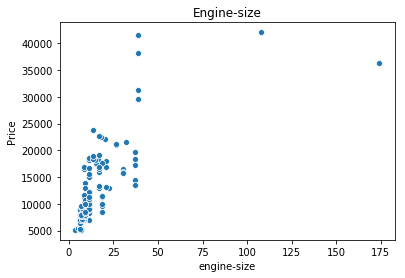

In [19]:
# (1) #STARTHIDE#
# [2 Marks] - Plot histogram with labels
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

(2) ***Your answer goes here:***  
A majority of the values for engine size lie between 0 and 25. The larger values of the engine size and the outliers might shift the linear regression line.



<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

Text(0.5, 1.0, 'Engine-size')

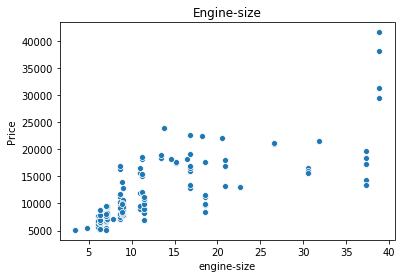

In [27]:
# (1) # Your Code goes here:

mask = auto_numeric["engine-size"] < (np.std(auto_numeric["engine-size"]) * 2 + np.mean(auto_numeric["engine-size"]))
#print(np.std(auto_numeric["engine-size"]))
auto_numeric_copy = auto_numeric[mask]

#print(auto_numeric_copy.shape)


ax = sns.scatterplot(auto_numeric_copy['engine-size'], auto_numeric_copy['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')


In [21]:
# (2) # Your Code goes here:

X= auto_numeric_copy.copy(deep=True)
X=X.drop(columns='price')
#print((X['engine-size']) == auto_numeric['engine-size'])
y= auto_numeric_copy['price']
regrModel = linear_model.Lasso()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

y_pred = cross_val_predict(regrModel,X,y, cv = kf)


print ("The Coefficient of Determination is : {:.3f}" .format(r2_score(y, y_pred)))
rmse = np.sqrt(mean_squared_error(y, y_pred))
print ("The Root mean squared error is : {:.3f}" .format(rmse))



The Coefficient of Determination is : 0.592
The Root mean squared error is : 3828.876


***Your answer goes here:***  
On removing the outliers, there seems to be a significant improvement by the significant reduction of Root mean squared error and the increase in the Coefficient of Determination.


### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [23]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***